<type 'datetime.datetime'>
Converted to <class 'pandas._libs.tslib.Timestamp'> 1970-01-01 00:00:00.817201
12 <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.timedeltas.TimedeltaIndex'> TimedeltaIndex(['00:00:00', '00:00:01', '00:00:02', '00:00:03', '00:00:04',
                '00:00:05', '00:00:06', '00:00:07', '00:00:08', '00:00:09',
                '00:00:10', '00:00:11'],
               dtype='timedelta64[ns]', freq=None)


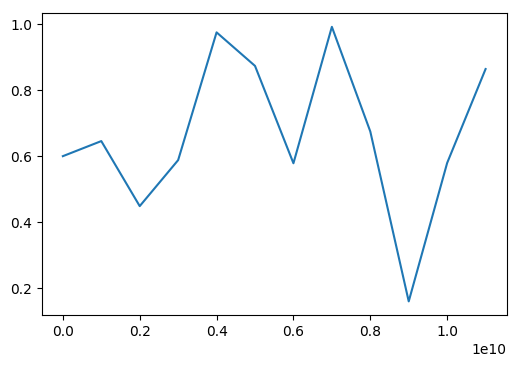

In [23]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# iMac: 
# matplotlib==2.1.1
# pandas==0.21.1

from datetime import datetime

from dateutil import parser
date = parser.parse("4th of July, 2015")
print type(date)

#np_start = np.datetime64(0,"s")
#print np_start, type(np_start)
start = pd.to_datetime(0.817201, unit='s')
print "Converted to",type(start),start
x = pd.DatetimeIndex(start + pd.to_timedelta(np.arange(12), 's'))
print x.size, type(x)

dx = x - x[0]
print type(dx), dx
y = np.random.random(dx.size)
fig, ax = plt.subplots()
ax.plot(dx,y)

fig.savefig('test.png')
fig.show()

In [24]:
import csv, re
import os.path


In [25]:
df = pd.DataFrame(columns=["one","two"])
print df, " rows=",df.shape[0]
df.loc[1] = [1, 1]
print df, " rows=",df.shape[0]
df.loc[5] = [0.5,5]
print df, " rows=",df.shape[0]
print "second row =\n", df.iloc[1]

Empty DataFrame
Columns: [one, two]
Index: []  rows= 0
  one two
1   1   1  rows= 1
   one two
1    1   1
5  0.5   5  rows= 2
second row =
one    0.5
two      5
Name: 5, dtype: object


In [26]:
class extDataFrame(pd.DataFrame):
    name = ""
    
    def __init__(self,name,columns):
        self.name = name
        super(extDataFrame,self).__init__(columns=columns)
        
    def __str__(self):
        s = "DataFrame "+self.name+"\n"
        s = s+ super(extDataFrame,self).__str__()+"\n"
        return s
    

In [27]:
a = extDataFrame("new",["A","B"])
a.loc[0] = [0.01,.101]
date = pd.to_datetime(0.02,unit="s")
a.loc[date] = [.2,.3]
print a
print "index",a.index[1]
print "A",a.A

DataFrame new
                               A      B
0                           0.01  0.101
1970-01-01 00:00:00.020000  0.20  0.300

index 1970-01-01 00:00:00.020000
A 0                             0.01
1970-01-01 00:00:00.020000    0.20
Name: A, dtype: float64


In [28]:
maxrows = 100
filename="Tensorflow-HP/nvprof-trace-tfhp.csv"
name_field_index = 18
time_field_index = 0
duration_field_index = 1
SSMem_field_index = 9
DSMem_field_index = 10
size_field_index = 11
throughput_field_index = 12
src_field_index = 13
dst_field_index = 14
context_index = 16
stream_index = 17

title_pattern = re.compile("^(Start|s).*")
cuda_pattern = re.compile("\[CUDA .*\]")

In [48]:
dataframes = []

def getDataframe(name):
    global dataframes  
    for df in dataframes:
        if df.name == name:
            return df
    df_n = extDataFrame(name,["Throughput","Size","Duration"])
    dataframes.append(df_n)
    return df_n

In [49]:
dataframes = []
rowcounter = 1
with open(filename, "rb") as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        if rowcounter > maxrows:
            break
            
        if len(line) > 3:
            if title_pattern.search(line[0]) is None:
                if cuda_pattern.search(line[name_field_index]) is not None:
                    #print line
                    name = line[name_field_index]+" "+line[src_field_index] +line[dst_field_index]
                    df = getDataframe(name)
                    start = pd.to_datetime(line[0], unit='s')
                    #end = pd.to_datetime(float(line[0]) + float(line[1]), unit='s')
                    #print [line[size_field_index], line[throughput_field_index]]
                    df.loc[start] = [float(line[throughput_field_index]), float(line[size_field_index]), float(line[duration_field_index])]
                    #df.loc[end] = [0, 0]                    
                else:
                    #series_arr = getKernelSeries(series_arr1,line)
                    #print len(line)
                    #print line[name_field_index]
                    print "kernel:",line
                # Fill series instance with corresponding fields of the CSV file line
        rowcounter += 1
    csvfile.close()
    

print "dataframes:",len(dataframes)


dataframes: 2
                            Throughput      Size  Duration
1970-01-01 00:00:01.201508    0.946105  0.001953  0.002016
1970-01-01 00:00:01.201676    0.002985  0.000004  0.001248
1970-01-01 00:00:01.201812    0.002985  0.000004  0.001248
1970-01-01 00:00:01.201944    0.186265  0.000244  0.001280
1970-01-01 00:00:01.202057    0.181721  0.000244  0.001312


                            Throughput      Size  Duration
1970-01-01 00:00:01.201508    0.946105  0.001953  0.002016
1970-01-01 00:00:01.201676    0.002985  0.000004  0.001248
1970-01-01 00:00:01.201812    0.002985  0.000004  0.001248
1970-01-01 00:00:01.201944    0.186265  0.000244  0.001280
1970-01-01 00:00:01.202057    0.181721  0.000244  0.001312
<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas._libs.tslib.Timestamp'>


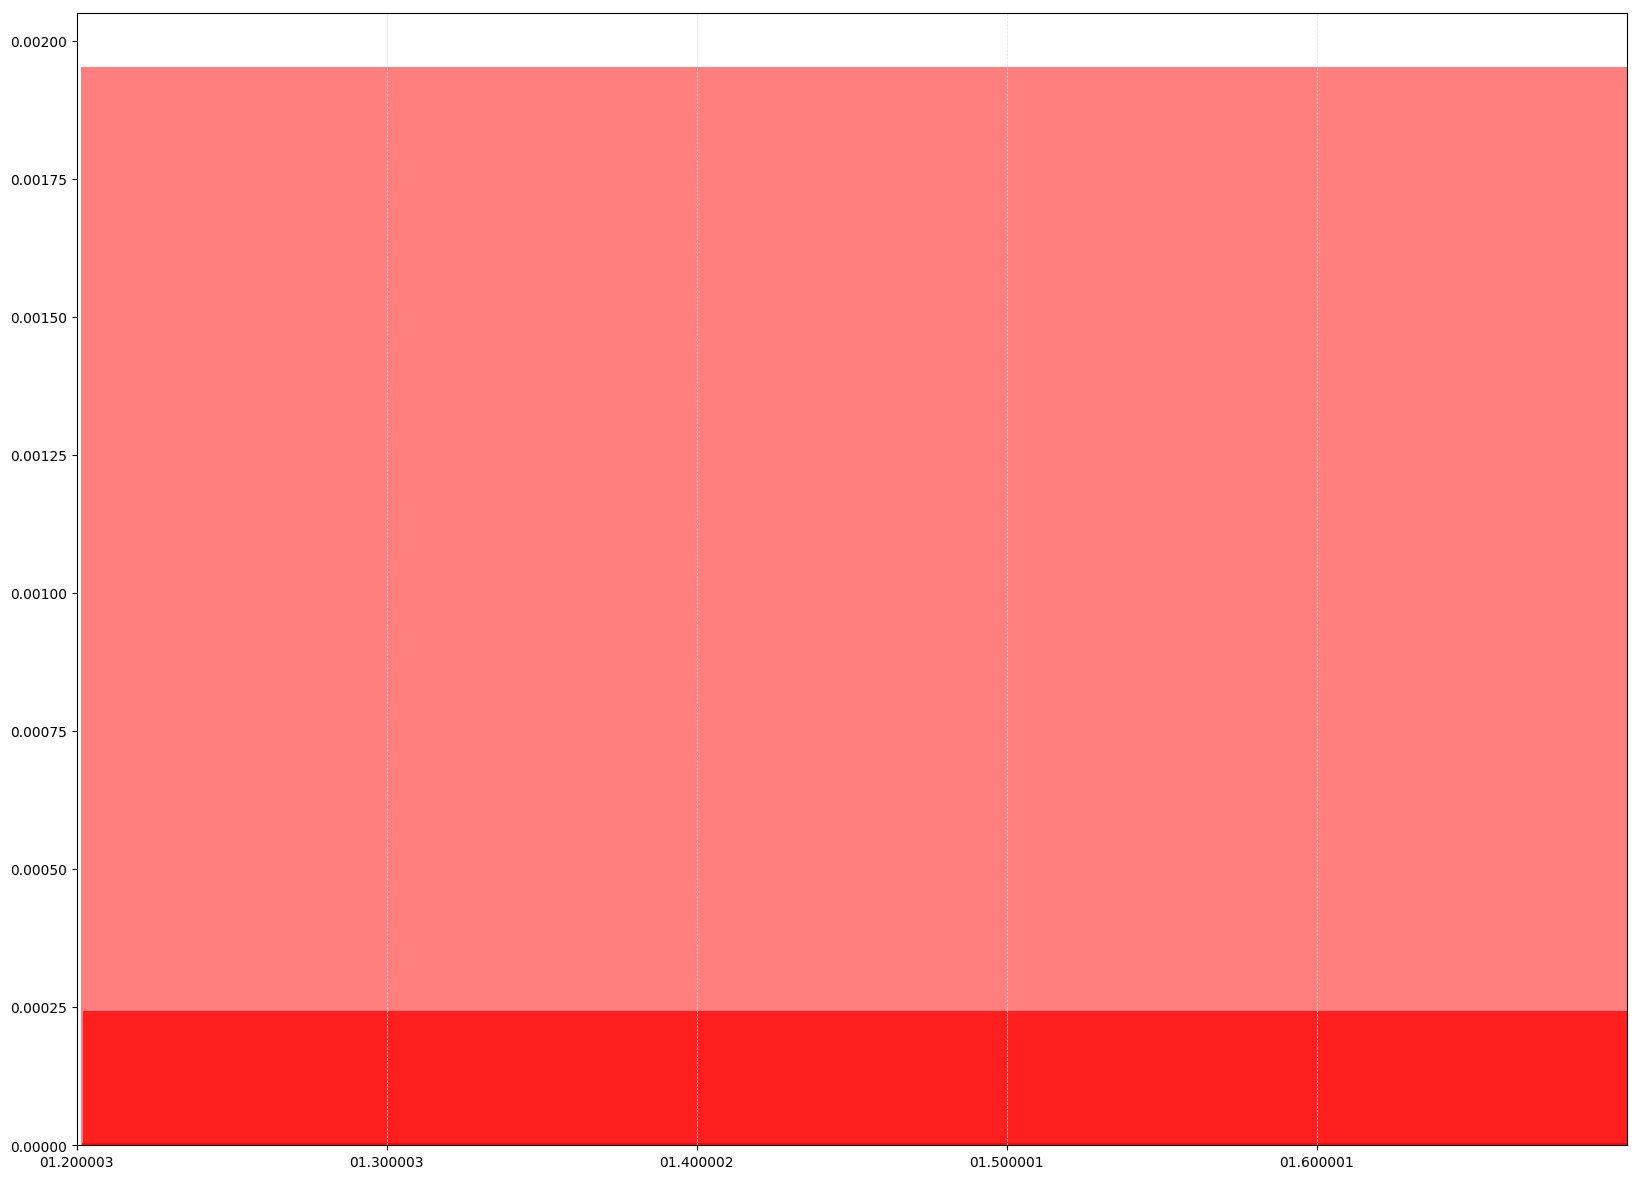

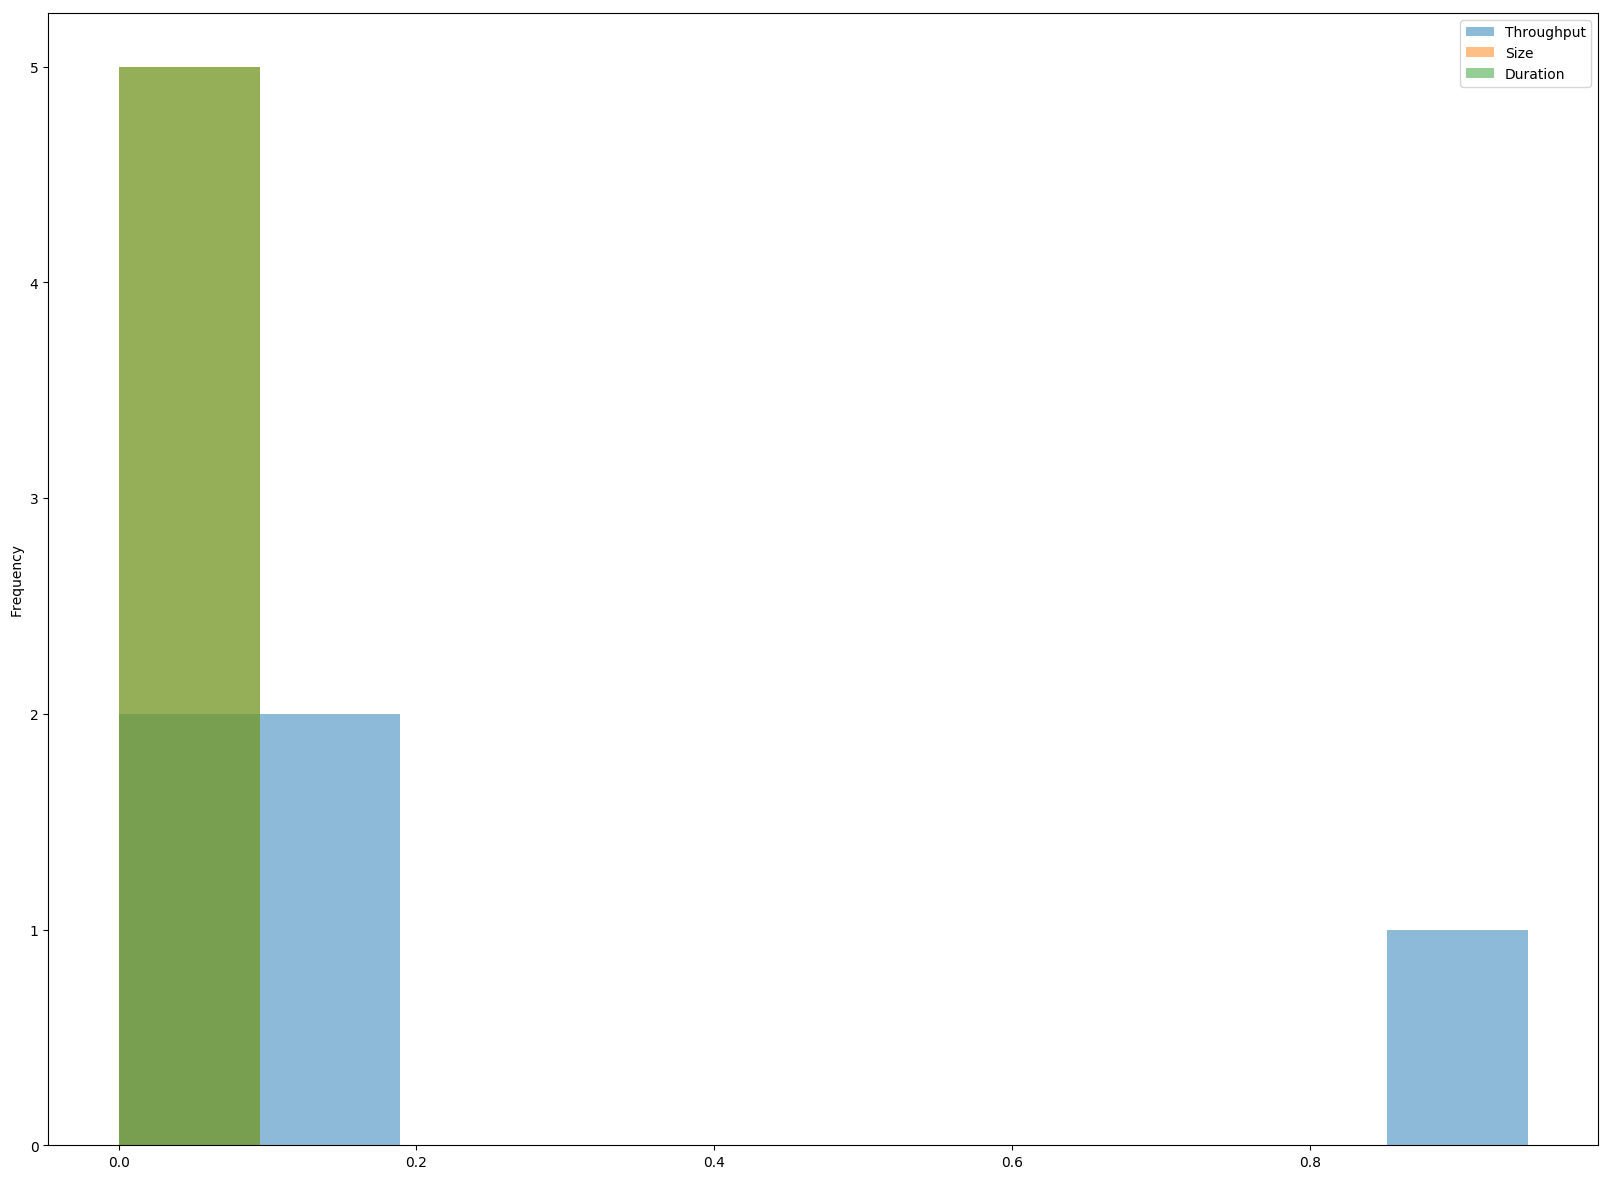

In [90]:
# import matplotlib.dates as dates
plt.rcParams['figure.figsize'] = 20,15
fig, ax = plt.subplots()
#for df in dataframes:
#    ax.plot(df.index,df["Throughput"],label=df.name,linewidth=0.3,drawstyle="steps-post")
df = dataframes[1][:5]
print df
#print df["Throughput"]
#df.Throughput.plot(label=df.name,linewidth=0.3)
#ax.bar(df.index,df["Throughput"],label=df.name)

#dataframes[1].Throughput.resample("ms").max().plot(drawstyle="steps-post",style=":",linewidth=0.9,color="r",label="max")
#dataframes[1].Throughput.resample("ms").median().plot(drawstyle="steps-post",style=":",linewidth=0.8,color="g",label="median")
#dataframes[1].Throughput.resample("ms").mean().plot(drawstyle="steps-post",style=":",linewidth=0.9,label="mean")
#dataframes[1].Throughput.resample("ms").sum().plot(drawstyle="steps-post",style=":",linewidth=0.9,label="sum")

#ax.scatter(df.index,df["Throughput"],label="Throughput")
times = pd.to_datetime(df.index)
size = df["Size"].astype("float")
duration = pd.to_timedelta(df["Duration"])
ax.bar(times,size,duration,align="edge",label="Size",color="r",alpha=0.5)
df.plot.hist(label="Size",alpha=0.5)
#ax.plot(df["Throughput"].resample("ms").max(),label="max Throughput",drawstyle="steps-post")
ax.xaxis.grid(color="#e0e0e0", linestyle="--",linewidth=0.5)
start = pd.to_datetime(1.2, unit='s')
print type(start)
interval = pd.to_timedelta(0.5, unit='s')
end = pd.Timestamp(start+interval)
print type(end)
ax.set_xlim(start,end)
#dataframes[1].Throughput.resample("ms").std().plot(drawstyle="steps-post",style="--",label="deviation")
plt.legend()
#ax.xaxis.grid(color="#e0e0e0", linestyle="--",linewidth=0.5)
#ax.xaxis.set_major_locator(dates.MicrosecondLocator(5000))
ax.xaxis.set_major_formatter(dates.DateFormatter('%S.%f'))
plt.show()


            

(94,) (11,)


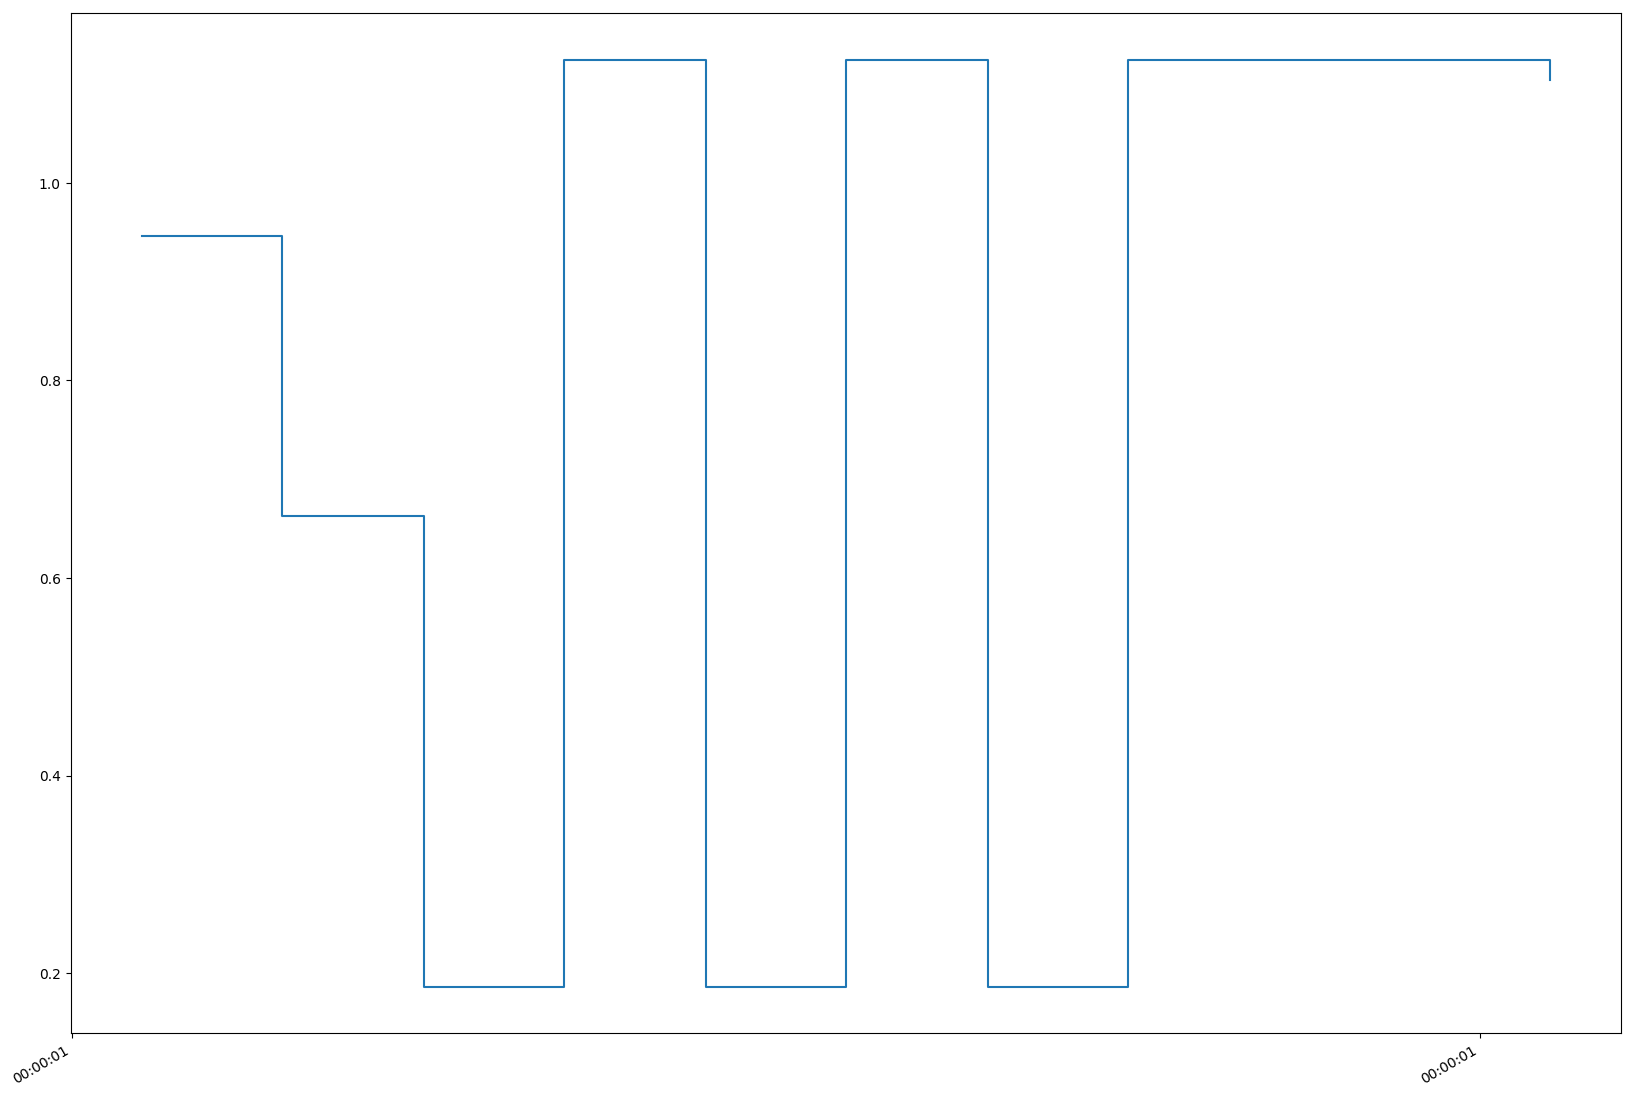

In [33]:
secunden = dataframes[1].Throughput.resample("ms").max()
print dataframes[1].Throughput.shape,secunden.shape
secunden.plot(drawstyle="steps-post")